In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt   #visulaization 

model,layer modules ko import kia gaya hai keras libary se 

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3  #RGB
EPOCHS = 50  


In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle=True , 
    image_size=(IMAGE_SIZE,IMAGE_SIZE), 
    batch_size=BATCH_SIZE
)                                 # dataset load kia hai 

Found 20638 files belonging to 15 classes.


In [4]:
class_names=dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

for image_batch, label_batch in dataset.take(1):: Yeh line dataset se ek batch of images aur unke corresponding labels ko extract karta hai. dataset.take(1) ek batch ko extract karta hai.

(32, 256, 256, 3)
[12 10 12  0  2  7  7 12  8 11  5  8 12  5 11  9  7  2  7 11 14 12  6  6
  1  5 13  8 14  7  7 14]


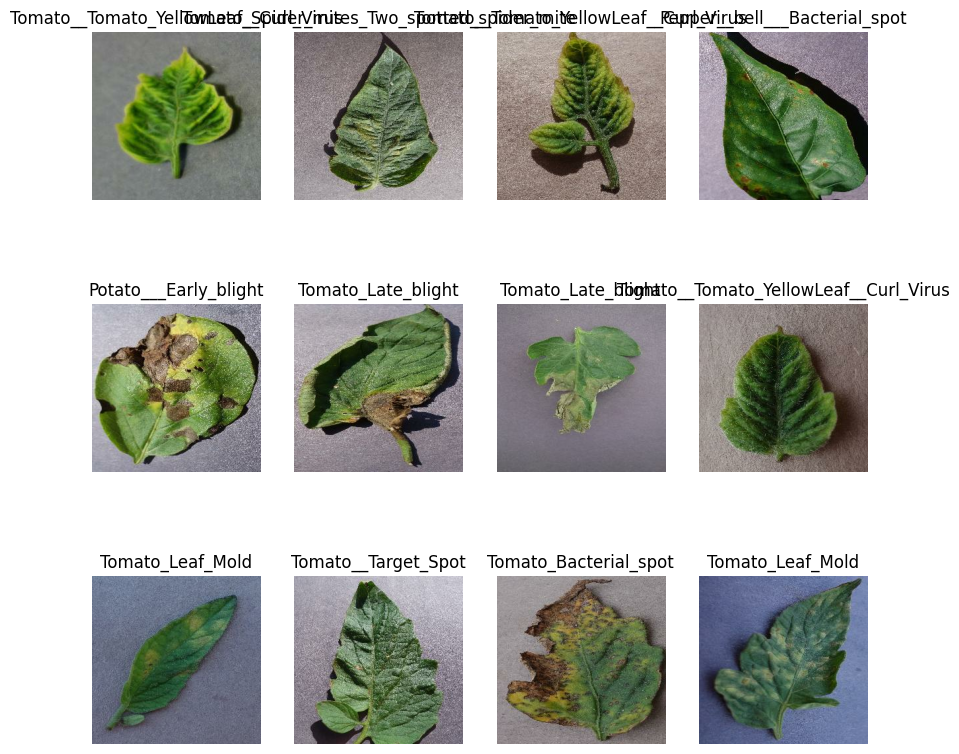

In [5]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) 
    for i in range(12): 
        plt.subplot(3,4,i+1)  # ploting operation 
        plt.imshow(image_batch[i].numpy().astype("uint8"))  
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80%= Training  
10%= validation  
10%= Testing 

In [6]:
train_size = 0.8    
len(dataset)*train_size

516.0

In [7]:
trai_ds=dataset.take(516)
len(trai_ds)

516

In [8]:
test_ds=dataset.skip(516)
len(test_ds)

129

In [9]:
val_size=0.1 
len(test_ds)*val_size

12.9

In [11]:
val_ds= test_ds.take(12) 
len(val_ds)

12

In [12]:
test_ds= test_ds.skip(6) 
len(val_ds)

12

In [13]:
def get_dataset_partition_tf(
    ds,
    train_split=0.8,
    val_split=0.1,
    test_split=0.1, 
    shuffle = True, 
    shuffle_size= 10000
    ):  
    assert(train_split+test_split+val_split)==1       # partition proportions 
    ds_size=len(ds) 
    if shuffle: 
        ds=ds.shuffle(shuffle_size,seed=12)        # sequence random order 
    train_size=int(train_split*ds_size) 
    val_size=int(val_split*ds_size) 
    train_ds=ds.take(train_size) 
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    #skip -> test set ko exrtact krta hai   
    #take -> train and validation set ko extract krta hai 
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds=get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

516

In [16]:
len(val_ds)

64

In [17]:
len(test_ds)

65

optimization code   

cache , Shuffle , prefetch 

In [18]:
trainds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.45882353 0.41960785 0.41568628]
  [0.45490196 0.41568628 0.4117647 ]
  [0.45490196 0.41568628 0.4117647 ]
  ...
  [0.6117647  0.5764706  0.5882353 ]
  [0.6392157  0.6039216  0.6156863 ]
  [0.65882355 0.62352943 0.63529414]]

 [[0.48235294 0.44313726 0.4392157 ]
  [0.45882353 0.41960785 0.41568628]
  [0.44313726 0.40392157 0.4       ]
  ...
  [0.65882355 0.62352943 0.63529414]
  [0.5686275  0.53333336 0.54509807]
  [0.6784314  0.6431373  0.654902  ]]

 [[0.48235294 0.44313726 0.4392157 ]
  [0.4627451  0.42352942 0.41960785]
  [0.4392157  0.4        0.39607844]
  ...
  [0.72156864 0.6862745  0.69803923]
  [0.7254902  0.6901961  0.7019608 ]
  [0.62352943 0.5882353  0.6       ]]

 ...

 [[0.6156863  0.5882353  0.6156863 ]
  [0.6117647  0.58431375 0.6117647 ]
  [0.60784316 0.5803922  0.60784316]
  ...
  [0.7490196  0.72156864 0.7490196 ]
  [0.7411765  0.7137255  0.7411765 ]
  [0.7294118  0.7019608  0.7294118 ]]

 [[0.6313726  0.6039216  0.6313726 ]
  [0.62352943 0.59607846 0.62352943]


Normalization  and Aumentation   

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)  # Normalizing the array
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)  # Normalizing the array
])

<b>MODEL TRAINING<b>

In [21]:
input_shape= (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes =15
#pooling = ek image ko 4px divide kro fir usme se jo bhi high order wala hoga use carry krlo , similarly bakiyo se saat krke append krdo 
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape) , 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu") , 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3),activation="relu") , 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3),activation="relu") , 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3),activation="relu") , 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,(3,3),activation="relu") , 
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(), 
    layers.Dense(64,activation="relu"),  
    layers.Dense(n_classes,activation="softmax"), 
    #Softmax activation function ki primary use classification problems mein hoti hai, jahan multiple 
    # classes hote hain aur model ko har class ke liye probability nikalni hoti hai.
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

TF m model ko fianlize ,
"Adam" ek popular optimization algorithm hai, jo adaptive learning rates ka use karta hai aur gradient descent ka ek improvement hai.


In [23]:
model.compile(
    optimizer="adam",  # adagrade function 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

# SparseCategoricalCrossentropy   to cover the "LOSS" function 

Verbose (verbose=1):

verbose parameter decide karta hai ki training process ke details print kiye jaayein ya nahi.
verbose=0 hota toh kuch bhi print nahi hota.
verbose=1 hota toh progress bar dikhta hai jo batata hai ki kitne epochs complete ho gaye hain, aur kitni accuracy achieve hui hai. Yeh ek visual representation provide karta hai training progress ka.
verbose=2 hota toh har epoch ke baad ek line print hoti hai jisme overall metrics dikhate hain

Epochs (epochs=EPOCHS):

epochs parameter decide karta hai ki training kitne epochs tak chalega. Ek epoch ka matlab hota hai ki model ne poora training dataset ek baar dekha.
Aapne EPOCHS variable mein ek value assign ki hai, jismein specify hota hai ki kitne epochs tak training karna hai. For example, agar EPOCHS = 50 hai, toh model 50 epochs tak train hoga.
Number of epochs ek hyperparameter hai jo depend karta hai dataset aur model complexity par. Jyada epochs ka use overfitting ka risk bhi badha sakta hai, isliye isko careful taur par choose karna important hai.

In [24]:
historymodel=model.fit(
    train_ds,
    batch_size=BATCH_SIZE, 
    validation_data= val_ds, 
    verbose=1, 
    epochs=EPOCHS   
)
# Model train krte hai tb use hota hai 

Epoch 1/50


196/516 [==========>...................] - ETA: 5:42 - loss: 2.3227 - accuracy: 0.2278

: 

In [26]:
score = model.evaluate(test_ds)

8/8 [==============================] - 6s 251ms/step - loss: 1.0988 - accuracy: 0.4492


In [27]:
score

[1.0987718105316162, 0.44921875]

In [30]:
historymodel.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [31]:
historymodel.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
historymodel.history["accuracy"]

[0.4688967168331146,
 0.6038732528686523,
 0.8116196990013123,
 0.8738425970077515,
 0.8946759104728699,
 0.9068287014961243,
 0.9166666865348816,
 0.9242957830429077,
 0.9231220483779907,
 0.9278169274330139,
 0.9242957830429077,
 0.9330986142158508,
 0.9436619877815247,
 0.9489436745643616,
 0.9642018675804138,
 0.9706572890281677,
 0.9501173496246338,
 0.9507042169570923,
 0.9518779516220093,
 0.9753521084785461,
 0.9618544578552246,
 0.9618544578552246,
 0.9659624695777893,
 0.9853286147117615,
 0.9812206625938416,
 0.9894366264343262,
 0.9688966870307922,
 0.9812206625938416,
 0.9829812049865723,
 0.9753521084785461,
 0.9876760840415955,
 0.9894366264343262,
 0.9853286147117615,
 0.98591548204422,
 0.987089216709137,
 0.9900234937667847,
 0.9803240895271301,
 0.9882628917694092,
 0.9894366264343262,
 0.9895833134651184,
 0.9964788556098938,
 0.9941314458847046,
 0.9888497591018677,
 0.9753521084785461,
 0.9829812049865723,
 0.9776995182037354,
 0.98591548204422,
 0.988262891769409

In [32]:
acc= historymodel.history['accuracy']
val_acc=historymodel.history["val_accuracy"] 

loss=historymodel.history["loss"]
val_loss=historymodel.history["val_loss"]

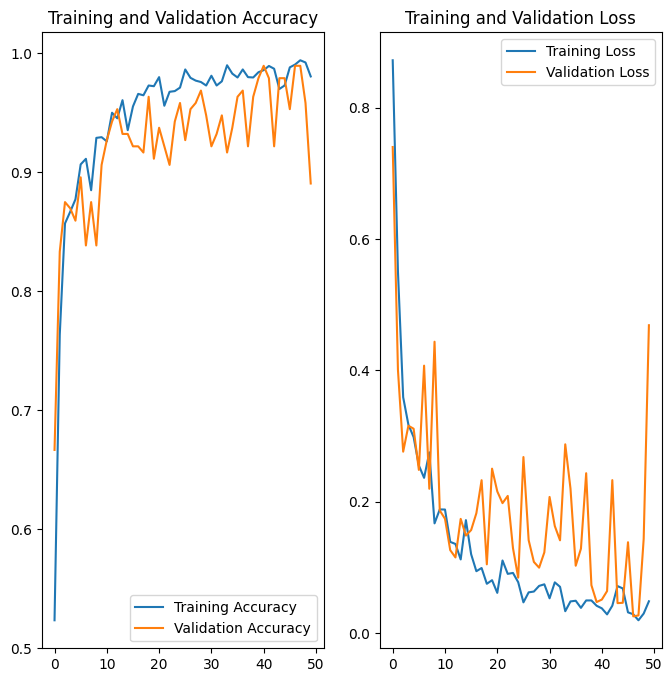

In [33]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)

plt.plot(range(EPOCHS), acc, label='Training Accuracy')

plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(range (EPOCHS), loss, label='Training Loss')

plt.plot(range (EPOCHS), val_loss, label='Validation Loss')

plt.legend(loc='upper right')

plt.title('Training and Validation Loss')

plt.show()

In [34]:
import numpy as np

1 image testing 

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label Potato___Late_blight


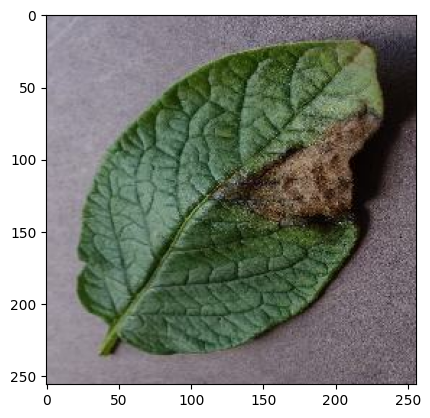

In [35]:
for image_batch ,label_batch in test_ds.take(1): 
   first_image= image_batch[0].numpy().astype("uint8")
   print("First image to predict")
   plt.imshow(first_image)
   
   print("Actual label:",class_names[ label_batch[0].numpy()])
   
   batch_prediction=model.predict(image_batch) 
   print("predicted label",class_names[ np.argmax(batch_prediction[0])])

<b>Creating a Function for MODEL <b>

In [36]:
def predict(model,img):  
    img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy()) 
    img_array=tf.expand_dims(img_array,0) 
    
    prediction=model.predict(img_array) 
    
    predicted_class = class_names[np.argmax(prediction[0])] 
    confidence=round(100*(np.max(prediction[0])),2)  
    return predicted_class,confidence

1/1 [==============================] - 0s 48ms/step


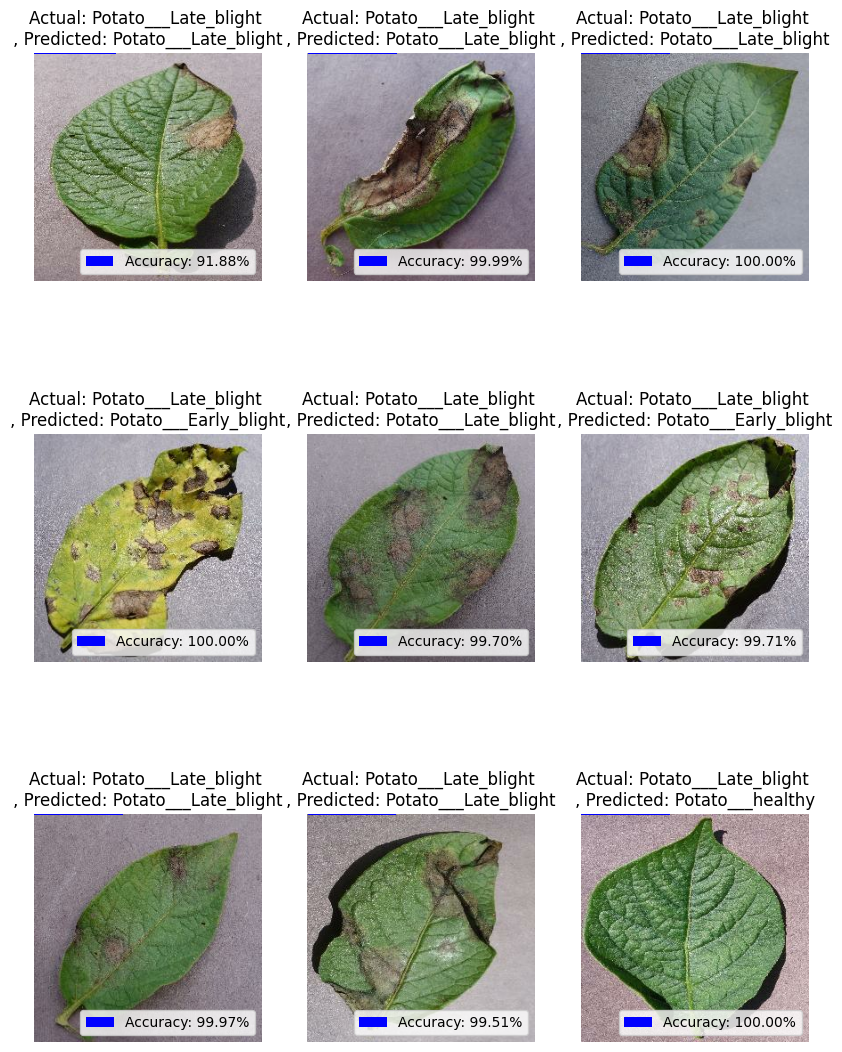

In [54]:
plt.figure(figsize=(10, 14))
for images, label in test_ds.take(1):
    for i in range(9):
        ac = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())

        # Plot confidence interval using a bar chart
        plt.barh([predicted_class], [confidence], color='blue')
        plt.xlabel("Confidence (%)\n")
        plt.title(f"Actual: {actual_class} \n, Predicted: {predicted_class}")

        plt.legend([f'Accuracy: {confidence:.2f}%'], loc='lower right')

        plt.axis("off")

plt.show()


In [46]:
import os               
model_version=max([int(i) for i in (os.listdir("Model")+[0])])+1
model.save(f"Model/{model_version}")

INFO:tensorflow:Assets written to: Model/3\assets


INFO:tensorflow:Assets written to: Model/3\assets


In [41]:
accuracy = score[1]

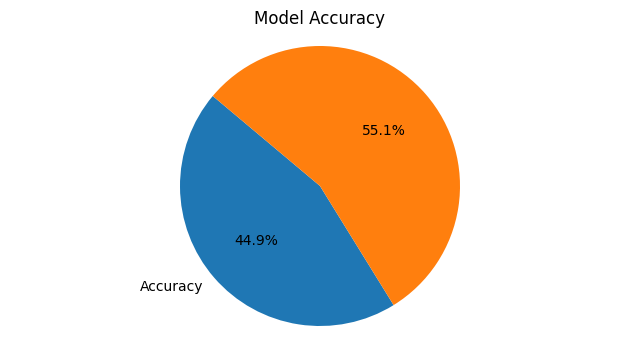

In [42]:
plt.figure(figsize=(8, 4))
plt.pie([accuracy, 1-accuracy], labels=['Accuracy', ''], autopct='%1.1f%%', startangle=140)
plt.title('Model Accuracy')
plt.axis('equal')
plt.show()

In [43]:
def calculate_damage_percentage(image):
    return 40.0  # Example value

In [44]:
damage_percentages = []
for images, label in test_ds.take(1):
    for i in range(9):
        damage_percentage = calculate_damage_percentage(images[i].numpy())
        damage_percentages.append(damage_percentage)

In [1]:
plt.figure(figsize=(8, 4))
plt.pie(damage_percentages, labels=['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8', 'Image 9'], autopct='%1.1f%%', startangle=140)
plt.title('Damage Percentage')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
def calculate_damage_percentage(image, label):
   
    return np.random.uniform(0, 100)  # Example: random damage percentage between 0 and 100

damage_percentages = []
labels = []
for images, label in test_ds.take(1):
    for i in range(9):
        damage_percentage = calculate_damage_percentage(images[i].numpy(), label[i].numpy())
        damage_percentages.append(damage_percentage)
        if label[i].numpy() == 0:
            labels.append('Normal')
        else:
            labels.append(class_names[label[i].numpy()])

plt.figure(figsize=(12, 6))
plt.bar(range(1, 10), damage_percentages, tick_label=labels, color=['blue' if label != 'Normal' else 'green' for label in labels])
plt.xlabel('Plant')
plt.ylabel('Damage Percentage')
plt.title('Damage Percentage for Each Plant')
plt.show()


In [ ]:
def can_recover(disease_name):

    return disease_name != 'Healthy'

recovery_status = {'Recoverable': 0, 'Non-Recoverable': 0}
for images, label in test_ds.take(1):
    for i in range(9):
        if can_recover(class_names[label[i].numpy()]):
            recovery_status['Recoverable'] += 1
        else:
            recovery_status['Non-Recoverable'] += 1

labels = recovery_status.keys()
sizes = recovery_status.values()

plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Recovery Status of Diseases')
plt.axis('equal')
plt.show()


In [ ]:
def is_sick(disease_name):
    # Your logic to determine if a plant is sick or healthy
    # This is just a placeholder, replace it with your actual logic
    return disease_name != 'Healthy'

sick_plants = []
healthy_plants = []
for images, label in test_ds.take(1):
    for i in range(9):
        if is_sick(class_names[label[i].numpy()]):
            sick_plants.append(i + 1)
        else:
            healthy_plants.append(i + 1)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sick_plants) + 1), sick_plants, label='Sick Plants', marker='o', color='red')
plt.plot(range(1, len(healthy_plants) + 1), healthy_plants, label='Healthy Plants', marker='o', color='green')
plt.xlabel('Time')
plt.ylabel('Number of Plants')
plt.title('Comparison of Sick and Healthy Plants')
plt.legend()
plt.grid(True)
plt.show()
